In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
data_groups=study_data_complete.groupby('Mouse ID')

data_groups.count()['Timepoint']

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# set the index to the mouse ID

# check the mouse data for ID

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_unique=study_data_complete
study_data_unique.drop_duplicates(subset=['Mouse ID','Timepoint'],keep=False,inplace=True)

study_data_unique

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(study_data_complete['Mouse ID'].unique())

249

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# series variable to hold Tumor Volume Data grouped by Drug Regimen
drug_groups=study_data_complete.groupby('Drug Regimen')
# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
drug_mean=drug_groups.mean()['Tumor Volume (mm3)']

# variable to hold median Tumor Volume Data Grouped by Drug Regimen
drug_median=drug_groups.median()['Tumor Volume (mm3)']

# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
drug_variance=drug_groups.var()['Tumor Volume (mm3)']

# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
drug_std=drug_groups.std()['Tumor Volume (mm3)']

# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
drug_sem=drug_groups.sem()['Tumor Volume (mm3)']

# Convert to DataFrame
summary_df=pd.DataFrame({'Mean Tumor Volume':drug_mean,'Median Tumor Volume':drug_median,'Tumor Volume Variance':drug_variance,'Tumor Volume Stdev':drug_std,'Tumor Volume SEM':drug_sem})
# Preview DataFrame
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# list of unique drug regimens

# drug regimen as x-axis values for plotting

# drop all duplicate mice


# get mice counts per drug
mice_groups=study_data_complete.groupby('Drug Regimen')

mouse_drug_counts=pd.DataFrame(mice_groups.nunique()['Mouse ID'])

mouse_drug_counts=mouse_drug_counts.sort_values(by='Mouse ID',ascending=False)

mouse_drug_counts

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Zoniferol,25


<AxesSubplot:title={'center':'Mouse Counts by Drug Regimen'}, xlabel='Drug Regimen'>

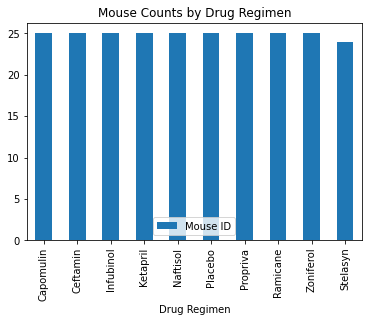

In [10]:
# plot the mouse counts for each drug using pandas

mouse_drug_counts.plot.bar(title='Mouse Counts by Drug Regimen')

<AxesSubplot:title={'center':'Total number of mesurments for each drug'}, xlabel='Drug Regimen'>

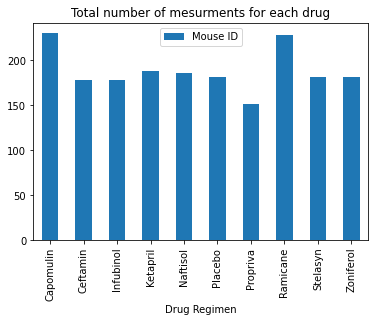

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
measurement_counts=pd.DataFrame(mice_groups.count()['Mouse ID'])

measurement_counts.plot.bar(title='Total number of mesurments for each drug')

,Mouse ID
Sex,
Female,124
Male,125


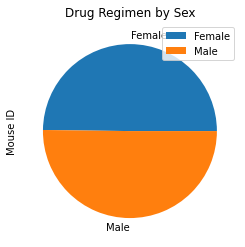

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_groups=study_data_complete.groupby('Sex')

sex_counts=pd.DataFrame(sex_groups.nunique()['Mouse ID'])



sex_counts.plot.pie(y='Mouse ID',title='Drug Regimen by Sex')


sex_counts


Text(0.5, 1.0, 'Drug Regimen by Sex')

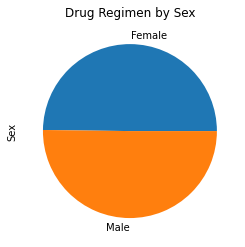

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts['Mouse ID'],labels=['Female','Male']  )


plt.ylabel('Sex')
plt.title('Drug Regimen by Sex')

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


regimens=study_data_unique[study_data_unique['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin

regimens.set_index('Drug Regimen')

# isolated view of just capomulin for later use


# Reset index so drug regimen column persists after inner merge
regimens.set_index('Mouse ID')

# get mouse count per drug

regimen_groups=regimens.groupby('Drug Regimen')

regimen_groups.count()['Mouse ID']


# Start by getting the last (greatest) timepoint for each mouse
mouse_groups=regimens.groupby('Mouse ID')
mouse_groups.max()['Timepoint'].head()

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
Name: Timepoint, dtype: int64

In [15]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
regimens=regimens.drop_duplicates(subset='Mouse ID', keep='last',inplace=False)
# show all rows of data
regimens

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
182,u153,0,45.000000,0,Ceftamin,Female,11,25
194,b447,0,45.000000,0,Ceftamin,Male,2,30
217,x226,0,45.000000,0,Ceftamin,Male,23,28
222,t573,0,45.000000,0,Ceftamin,Female,15,27
420,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers
drug_list=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
LQ=regimens.describe()['Tumor Volume (mm3)'].loc['25%',]
UQ=regimens.describe()['Tumor Volume (mm3)'].loc['75%',]
IQR=regimens.describe()['Tumor Volume (mm3)'].loc['75%',]-regimens.describe()['Tumor Volume (mm3)'].loc['25%',]
Mean=regimens.describe()['Tumor Volume (mm3)'].loc['mean',]    
Median=regimens.describe()['Tumor Volume (mm3)'].loc['50%',]    
# Locate the rows which contain mice on each drug and get the tumor volumes
regimens[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']].head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
182,u153,Ceftamin,45.000000
194,b447,Ceftamin,45.000000
217,x226,Ceftamin,45.000000
222,t573,Ceftamin,45.000000
420,c326,Infubinol,36.321346


In [17]:
# Determine outliers using upper and lower bounds
print(f'The lower quartile of Tumor Volume is: {LQ}')
print(f'The upper quartile of Tumor Volume is: {UQ}')
print(f'The interquartile range of Tumor Volume is: {IQR}')
print(f'The the median of Tumor Volume is: {Median}')
print(f'Values below {LQ-(IQR*1.5)} could be outliers.')
print(f'Values above {UQ+(IQR*1.5)} could be outliers.')

The lower quartile of Tumor Volume is: 37.1877438025
The upper quartile of Tumor Volume is: 59.930261755
The interquartile range of Tumor Volume is: 22.742517952499995
The the median of Tumor Volume is: 45.0
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


In [18]:
# add subset 
regimens.set_index('Drug Regimen')
subset=regimens[['Drug Regimen','Tumor Volume (mm3)']]

# tumor volumes for each Drug Regimen
Capomulin=subset[subset['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
Ramicane=subset[subset['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
Infubinol=subset[subset['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
Ceftamin=subset[subset['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']

Text(0.5, 1.0, 'Tumor Volume for Drug Regimen')

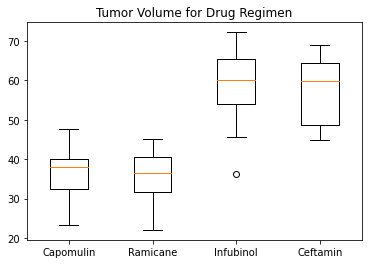

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot([Capomulin,Ramicane,Infubinol,Ceftamin])
plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.title('Tumor Volume for Drug Regimen')

Text(0.5, 1.0, 'Capomulin Results for Mouse s185')

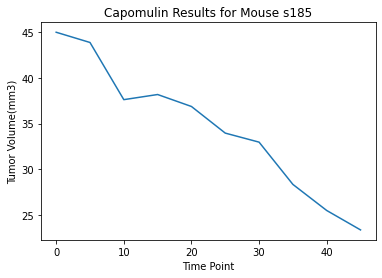

In [20]:

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#change index to mouse ID 
study_data_unique.set_index('Timepoint')
#remove other mouse IDs so only s185 shows
s185=study_data_unique[study_data_unique['Mouse ID']=='s185']
s185=s185[['Timepoint','Tumor Volume (mm3)']]
s185
#set the x-axis equal to the Timepoint and y-axis to Tumor Volume

plt.plot(s185['Timepoint'],s185['Tumor Volume (mm3)'])
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume(mm3)')
plt.title('Capomulin Results for Mouse s185')

Text(0.5, 1.0, 'Tumor Volume Average vs Mouse Weight')

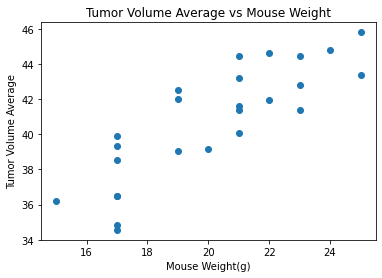

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# group by mouse ID to find average tumor volume
study_data_capomulin=study_data_unique[study_data_unique['Drug Regimen']=='Capomulin']
ID_groups=study_data_capomulin.groupby('Mouse ID')
ID_avg=ID_groups.mean()
ID_avg=ID_avg[['Tumor Volume (mm3)','Weight (g)']]

# establish x-axis value for the weight of the mice


# produce scatter plot of the data
plt.scatter(y=ID_avg['Tumor Volume (mm3)'],x=ID_avg['Weight (g)'])
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Tumor Volume Average')
plt.title('Tumor Volume Average vs Mouse Weight')

In [22]:
r=pearsonr(ID_avg['Weight (g)'],ID_avg['Tumor Volume (mm3)'])[0]

print('The correlation between both factors is',r)

The correlation between both factors is 0.8419363424694717


Text(0.5, 1.0, 'Tumor Volume Average vs Mouse Weight')

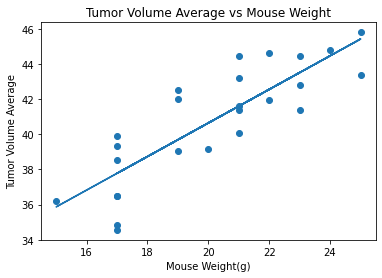

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg


#print St. Pearson Correlation Coefficient

# establish linear regression values

# linear regression line 


# scatter plot of the data

plt.scatter(y=ID_avg['Tumor Volume (mm3)'],x=ID_avg['Weight (g)'])

m,b=np.polyfit(ID_avg['Weight (g)'],ID_avg['Tumor Volume (mm3)'],1)

plt.plot(ID_avg['Weight (g)'],ID_avg['Weight (g)']*m+b)
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Tumor Volume Average')
plt.title('Tumor Volume Average vs Mouse Weight')